# Классификация рукописных цифр из базы MNIST с использованием нейронных сетей

Загружаем датасет [MNIST](http://yann.lecun.com/exdb/mnist/). 

In [1]:
import codecs
import array
import struct
import os
import urllib
import gzip

import numpy as np

import matplotlib.pyplot as plt

In [2]:
from mnist import load_dataset

In [3]:
train_images, train_labels, test_images, test_labels = load_dataset()

In [4]:
print("Train size = %i, test_size = %i" % (len(train_images), len(test_images)))

Train size = 60000, test_size = 10000


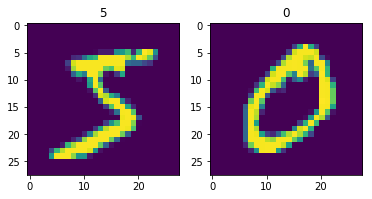

In [5]:
for i in [0, 1]:
    plt.subplot(1, 2, i + 1)
    plt.imshow(train_images[i].reshape([28, 28]))
    plt.title(str(train_labels[i]))

Переводим датасет из бинарного представления в формат numpy матрицы. 

In [6]:
n_train = len(train_labels)
n_test = len(test_labels)

Предобрабатываем получившуюся выборку:
 - приводим все входные признаки в интервал [0;1]
 - представляем метки классов с помощью one-hot encoding

In [23]:
import keras
from keras.models import Sequential                                    
from keras.layers import Dense, Activation, Dropout                   
from keras.optimizers import SGD  , Adam                            
from keras.utils.np_utils import to_categorical
from keras.regularizers import l2
from keras import backend as K

In [8]:
def preprocess(X, y):
    X = X.astype('float32').reshape(X.shape[0], X.shape[1] * X.shape[2])
    X /= 255
    y = to_categorical(y, 10)
    idxs = np.random.permutation(np.arange(X.shape[0]))
    return X[idxs,:],y[idxs,:]

In [9]:
train_images.shape

(60000, 1, 28, 28)

In [10]:
X_train, y_train = preprocess(np.squeeze(train_images), train_labels)
X_test, y_test = preprocess(np.squeeze(test_images), test_labels)
X_train.shape

(60000, 784)

Обучаем простую полносвязную сеть из 1 слоя на базе MNIST. В качестве функции потерь будем использовать кросс-энтропию - обобщение логистической регрессии на случай нескольких классов.
Сеть будет обучаться с помошью стохастического градиентного спуска.

In [24]:
model = Sequential()

model.add(Dense(10, init='uniform'))
model.add(Activation('softmax'))

sgd = Adam()
model.compile(loss='categorical_crossentropy',
        optimizer=sgd,
        metrics=['accuracy'])

/home/darimoon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, kernel_initializer="uniform")`
  import sys


In [25]:
history = model.fit(X_train, y_train,
        nb_epoch=40,
        batch_size=128,
        verbose=1,
        validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, batch_size=128)
print(score)

/home/darimoon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 3s 43us/step - loss: 2.2645 - acc: 0.4296 - val_loss: 2.2251 - val_acc: 0.5862
Epoch 2/40
60000/60000 [==============================] - 2s 41us/step - loss: 2.1904 - acc: 0.6056 - val_loss: 2.1512 - val_acc: 0.6438
Epoch 3/40
60000/60000 [==============================] - 2s 39us/step - loss: 2.1192 - acc: 0.6518 - val_loss: 2.0800 - val_acc: 0.6936
Epoch 4/40
60000/60000 [==============================] - 2s 39us/step - loss: 2.0506 - acc: 0.6804 - val_loss: 2.0115 - val_acc: 0.7304
Epoch 5/40
60000/60000 [==============================] - 2s 40us/step - loss: 1.9847 - acc: 0.7102 - val_loss: 1.9455 - val_acc: 0.7433
Epoch 6/40
60000/60000 [==============================] - 3s 44us/step - loss: 1.9211 - acc: 0.7207 - val_loss: 1.8821 - val_acc: 0.7581
Epoch 7/40
60000/60000 [==============================] - 2s 37us/step - loss: 1.8599 - acc: 0.7404 - val_loss: 1.8212 - val_acc

Строим графики обучения.

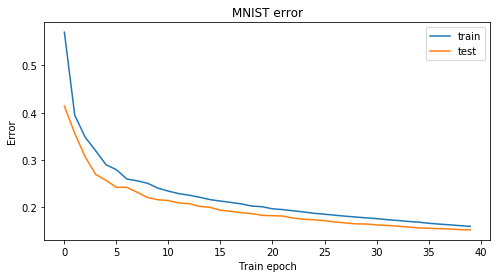

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt

train_error = 1 - np.array(history.history['acc'])
val_error = 1 - np.array(history.history['val_acc'])

plt.figure(figsize=(8, 4))
plt.plot(train_error, label = 'train')
plt.plot(val_error, label = 'test')
plt.title('MNIST error')
plt.xlabel('Train epoch')
plt.ylabel('Error')
plt.legend()
plt.show()

<img src="http://download.gamezone.com/uploads/image/data/1190338/article_post_width_a88.jpg" width=360>


In [27]:
model = Sequential()

model.add(Dense(512, input_dim=len(X_train[0]), init='uniform'))
model.add(Activation('relu'))
model.add(Dense(512, init='uniform'))
model.add(Activation('sigmoid'))
model.add(Dense(10, init='uniform'))
model.add(Activation('softmax'))

sgd = Adam()
model.compile(loss='categorical_crossentropy',
        optimizer=sgd,
        metrics=['accuracy'])

/home/darimoon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, input_dim=784, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
/home/darimoon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, kernel_initializer="uniform")`
  """
/home/darimoon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, kernel_initializer="uniform")`
  import sys


![img](https://habrastorage.org/webt/sg/7t/tu/sg7ttuirleaml3_j7dwo2tn0iqs.png)

In [28]:
history = model.fit(X_train, y_train,
        nb_epoch=40,
        batch_size=128,
        verbose=1,
        validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, batch_size=128)
print(score)

/home/darimoon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 19s 312us/step - loss: 1.3018 - acc: 0.5563 - val_loss: 0.6702 - val_acc: 0.7941
Epoch 2/40
60000/60000 [==============================] - 18s 296us/step - loss: 0.5466 - acc: 0.8326 - val_loss: 0.4421 - val_acc: 0.8644
Epoch 3/40
60000/60000 [==============================] - 17s 290us/step - loss: 0.4069 - acc: 0.8787 - val_loss: 0.3595 - val_acc: 0.8952
Epoch 4/40
60000/60000 [==============================] - 17s 290us/step - loss: 0.3532 - acc: 0.8960 - val_loss: 0.3224 - val_acc: 0.9051
Epoch 5/40
60000/60000 [==============================] - 16s 270us/step - loss: 0.3219 - acc: 0.9051 - val_loss: 0.3058 - val_acc: 0.9084
Epoch 6/40
60000/60000 [==============================] - 19s 320us/step - loss: 0.2975 - acc: 0.9125 - val_loss: 0.2831 - val_acc: 0.9167
Epoch 7/40
60000/60000 [==============================] - 17s 282us/step - loss: 0.2773 - acc: 0.9183 - val_loss: 0.

In [ ]:
import sys
import os
import time

import numpy as np

__doc__="""taken from https://github.com/Lasagne/Lasagne/blob/master/examples/mnist.py"""

def load_dataset():
    # We first define a download function, supporting both Python 2 and 3.
    if sys.version_info[0] == 2:
        from urllib import urlretrieve
    else:
        from urllib.request import urlretrieve

    def download(filename, source='http://yann.lecun.com/exdb/mnist/'):
        print("Downloading %s" % filename)
        urlretrieve(source + filename, filename)

    # We then define functions for loading MNIST images and labels.
    # For convenience, they also download the requested files if needed.
    import gzip

    def load_mnist_images(filename):
        if not os.path.exists(filename):
            download(filename)
        # Read the inputs in Yann LeCun's binary format.
        with gzip.open(filename, 'rb') as f:
            data = np.frombuffer(f.read(), np.uint8, offset=16)
        # The inputs are vectors now, we reshape them to monochrome 2D images,
        # following the shape convention: (examples, channels, rows, columns)
        data = data.reshape(-1, 1, 28, 28)
        # The inputs come as bytes, we convert them to float32 in range [0,1].
        # (Actually to range [0, 255/256], for compatibility to the version
        # provided at http://deeplearning.net/data/mnist/mnist.pkl.gz.)
        return data / np.float32(256)

    def load_mnist_labels(filename):
        if not os.path.exists(filename):
            download(filename)
        # Read the labels in Yann LeCun's binary format.
        with gzip.open(filename, 'rb') as f:
            data = np.frombuffer(f.read(), np.uint8, offset=8)
        # The labels are vectors of integers now, that's exactly what we want.
        return data

    # We can now download and read the training and test set images and labels.
    X_train = load_mnist_images('train-images-idx3-ubyte.gz')
    y_train = load_mnist_labels('train-labels-idx1-ubyte.gz')
    X_test = load_mnist_images('t10k-images-idx3-ubyte.gz')
    y_test = load_mnist_labels('t10k-labels-idx1-ubyte.gz')

    # We reserve the last 10000 training examples for validation.
#     X_train, X_val = X_train[:-10000], X_train[-10000:]
#     y_train, y_val = y_train[:-10000], y_train[-10000:]

    # We just return all the arrays in order, as expected in main().
    # (It doesn't matter how we do this as long as we can read them again.)
    return X_train, y_train, X_test, y_test

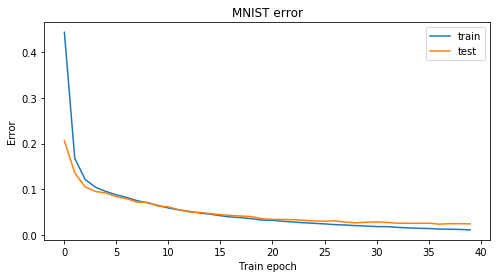

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt

train_error = 1 - np.array(history.history['acc'])
val_error = 1 - np.array(history.history['val_acc'])

plt.figure(figsize=(8, 4))
plt.plot(train_error, label = 'train')
plt.plot(val_error, label = 'test')
plt.title('MNIST error')
plt.xlabel('Train epoch')
plt.ylabel('Error')
plt.legend()
plt.show()